# Unscented Kalman Filters


## 1. Introduction

* If you look into the code of a car and cruise control system with automatic distance keeping, you will find an Extended Kalman Filter
* UKF deals with nonlinear models
* Instead of linearzing a nonlinear function, the UKF uses so-called sigma points to approximate the probability distribution
* Two Advantages:
    1. Sigma points approximate the nonlinear transition better than a linearization does
    2. And it is not necessary to calculate the Jacobian matrix
    


## 2. The CTRV Model

### a) Motion Models and Kalman Filters
In the extended kalman filter lesson, we used a **constant velocity model (CV)**. A constant velocity model is one of the most basic motion models used with object tracking.

But there are many other models including:

* constant turn rate and velocity magnitude model (CTRV)
* constant turn rate and acceleration (CTRA)
* constant steering angle and velocity (CSAV)
* constant curvature and acceleration (CCA)

Each model makes different assumptions about an object's motion. In this lesson, you will work with the CTRV model.

Keep in mind that you can use any of these motion models with either the extended Kalman filter or the unscented Kalman filter, but we wanted to expose you to more than one motion model.

### b) Robot Motion and Trigonometry
Motion model development relies on some essential concepts of trigonometry. As a trigonometry refresher in the context of robot motion, we have created [this optional content](https://classroom.udacity.com/nanodegrees/nd013/parts/40f38239-66b6-46ec-ae68-03afd8a601c8/modules/87f3782a-0a5b-4568-bcf2-edad2f5fdd76/lessons/60367cb6-526f-4255-a92a-c850038c4675/concepts/3d7a14af-6afa-446e-9399-622360eddd6c).

#### Limitations of the Constant Velocity (CV) Model

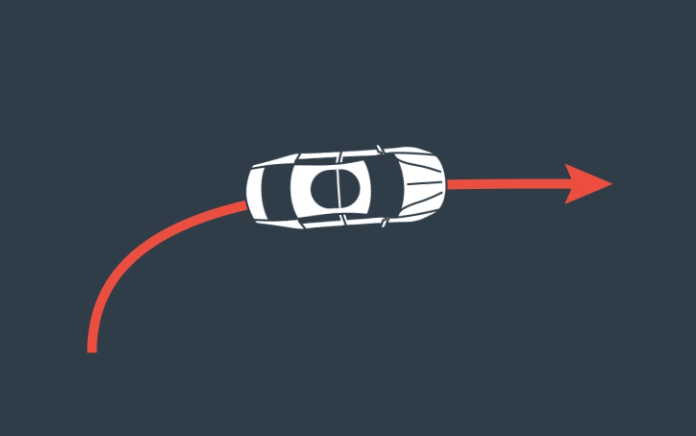

Assume a vehicle drives straight at first and then goes into a turn. If we apply a Kalman Filter to track the vehicle (using the process model from the last lesson, which assumes constant velocity), what do you expect to happen with our estimation result for the vehicle position?

**Answer: The position estimation would tend to result outside the actually driven circle**

## 3. The CTRV Model State Vector

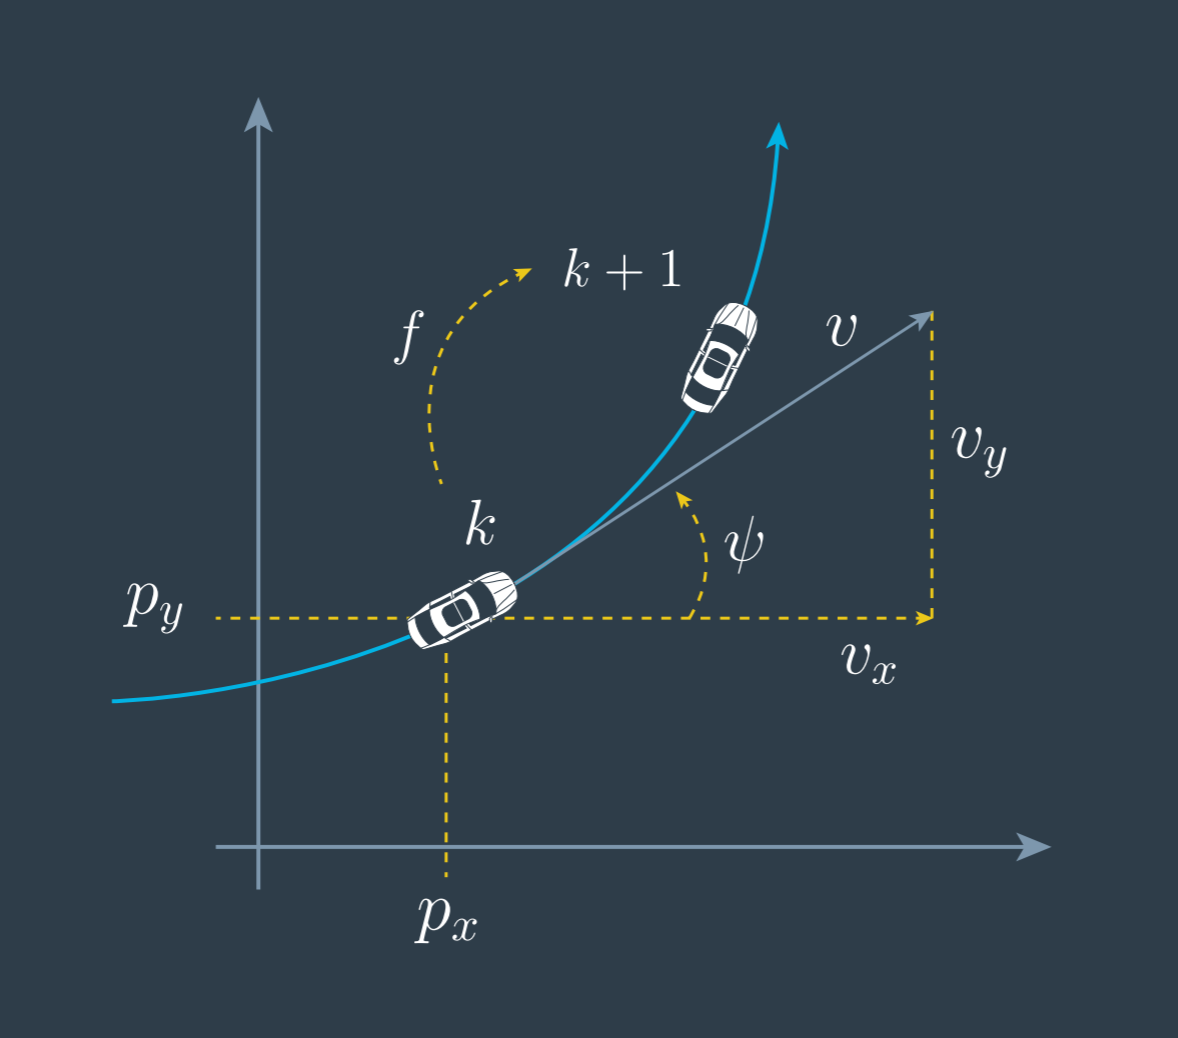

In the following quizzes, you'll be using state vectors to draw qualitative observations about the motion of turning objects.

#### General State Vector
x = \begin{bmatrix} p_x\\ p_y\\ v\\ \psi\\ \dot{\psi} \end{bmatrix}

#### State Vector 1
x = \begin{bmatrix} 2 \space m\\ 4 \space m\\ 7 \space m/s\\ 0.5 \space rad\\ 0.6 \space rad/s \end{bmatrix}

#### State Vector 2
x = \begin{bmatrix} 2 \space m\\ 4 \space m\\ 7 \space m/s\\ 0.5 \space rad\\ 0 \space rad/s \end{bmatrix}

#### State Vector 3
x = \begin{bmatrix} 2 \space m\\ 4 \space m\\ 9 \space m/s\\ 0.5 \space rad\\ 0.6 \space rad/s \end{bmatrix} 


#### QUESTION 1 OF 2

Which of the above (☝) state vector(s) represent(s) a car driving on a straight path?

**Answer: #2**

#### QUESTION 2 OF 2

Which of the above state vectors has the smallest turning radius?

**Answer: #1**


## 4. CTRV Differential Equation

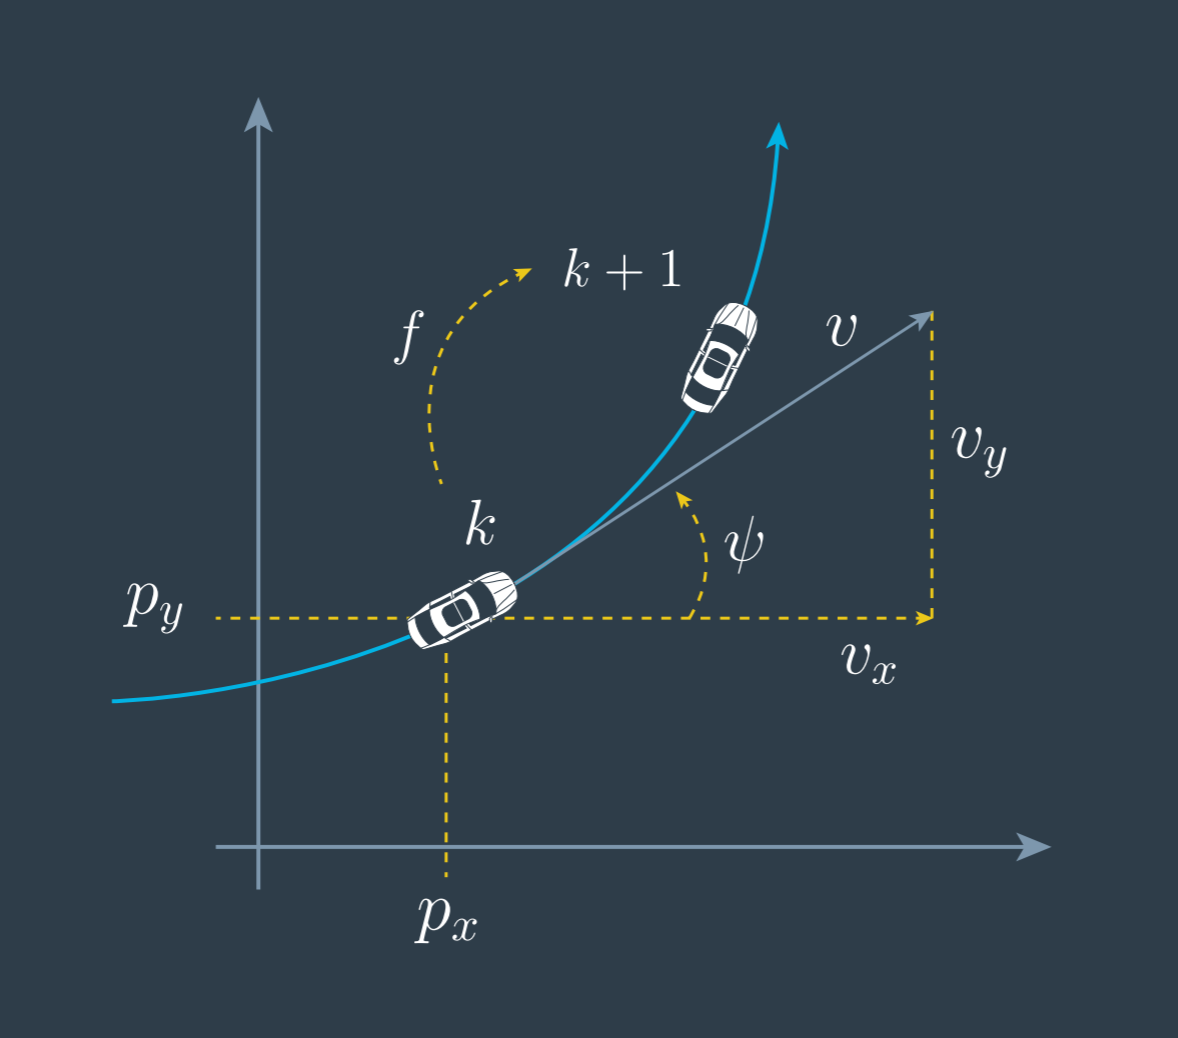
The CTRV model.

p_{x}_dot = cos(ψ)⋅v

p_{y}_dot = sin(ψ)⋅v

v_dot = 0

ψ_dot = ψ_dot

ψ_dot_dot = 0

## 5. CTRV Integral 1

the integral of the change in velocity from time k to k+1
t_k -> t_k+1

∫ v_dot(t) dt = 0

∫ ψ_dot(t) dt = ψ_{k}_dot⋅Δt

∫ ψ_dot_dot(t) dt = 0


## 6. CTRV Integral 2

The general form of the solved integral can be found [here](http://www.wolframalpha.com/input/?i=v+int+cos(a+%2B+b+*+(t+-+c+))+dt,++t+%3D+c+to+d).

### Displacement in x:
v_{k} ∫ cos(ψ_{k} + ψ_{k}_dot ⋅(t − t_{k})) dt

= v_{k}/ψ_{k}_dot ⋅ (sin(ψ_{k} + ψ_{k}_dot ⋅ Δt) − sin(ψ_{k}))

### Displacement in y:
v_{k} ∫ sin(ψ_{k} + ψ_{k}_dot ⋅(t − t_{k})) dt

= v_{k}/ψ_{k}_dot ⋅ (-cos(ψ_{k} + ψ_{k}_dot ⋅ Δt) + cos(ψ_{k}))

## 7. CTRV Zero Yaw Rate

Special case when the yaw rate is zero (driving inn a straight line), ψ_{k}_dot = 0

### Displacement in x:

v_{k} cos(ψ_{k})Δt

### Displacement in y:

v_{k} sin(ψ_{k})Δt

## 8. CTRV Process Noise Vector

Process Noise Vector ν_{k} = [ν_{a, k}, ν_{ψ_dot_dot, k}]T

### 1) What is the influence on the velocity?
In other words, what is cc in the process model?

Δt ⋅ ν_{a,k}

### 2) What is the influence on the yaw angle?
In other words, what is dd in the process model?

1/2 ⋅ (Δt)^2 ⋅ ν_{ψ_dot_dot, k}

### 3) What is the influence on the yaw rate?
In other words, what is \large ee in the process model?

(Δt) ⋅ ν_{ψ_dot_dot, k}

## 9. CTRV Process Noise Position

### 1) What would the x acceleration offset be if the car were driving perfectly straight?
In other words, what is a?

1/2 ⋅ (Δt)^2 ⋅ cos(ψ_{k}) ⋅ ν_{a, k}

### 2) What would the y acceleration offset be if the car were driving perfectly straight?
In other words, what is b?

1/2 ⋅ (Δt)^2 ⋅ sin(ψ_{k}) ⋅ ν_{a, k}

## 10. UKF Process Chain

### a) Unscented Kalman Filter Introduction
Now that you have learned the CTRV motion model equations, we will discuss how the unscented Kalman filter works. As you go through the lectures, recall that the extended Kalman filter uses the Jacobian matrix to linearize non-linear functions.

The unscented Kalman filter, on the other hand, does not need to linearize non-linear functions; instead, the unscented Kalman filter takes representative points from a Gaussian distribution. These points will be plugged into the non-linear equations as you'll see in the lectures.


## 11. What Problem Does the UKF Solve?

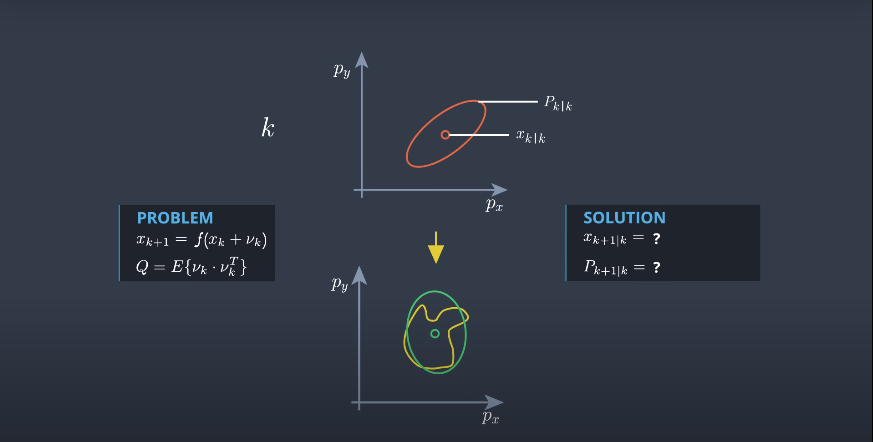

* Unscented Transform
* Find a eclipse with the same mean value and the covariance matrix as the real non guassian distribution


## 12. UKF Basics Unscented Transformation

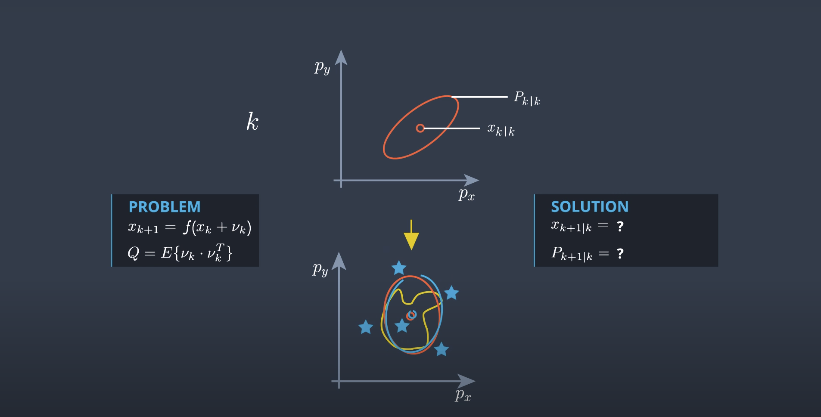

## 13. Generating Sigma Points

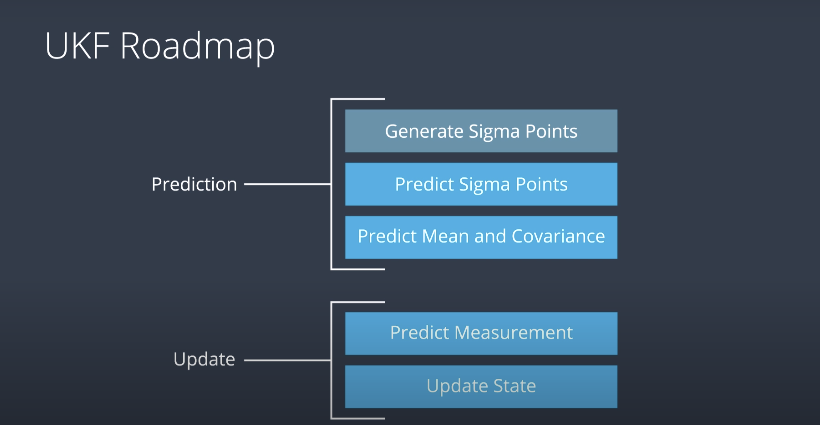

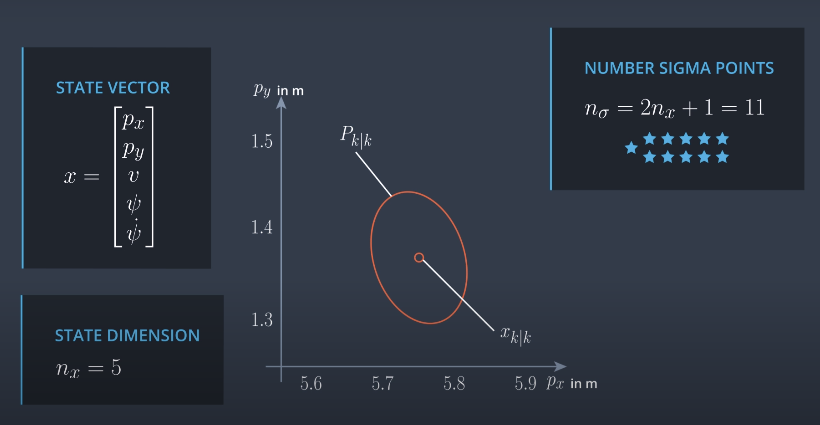

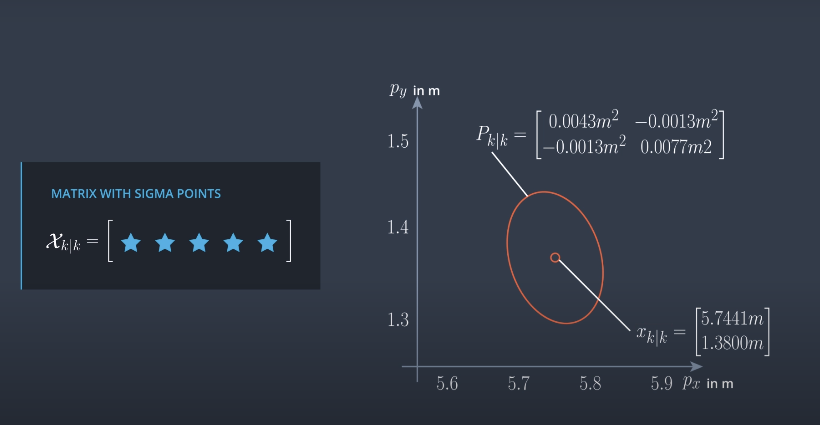

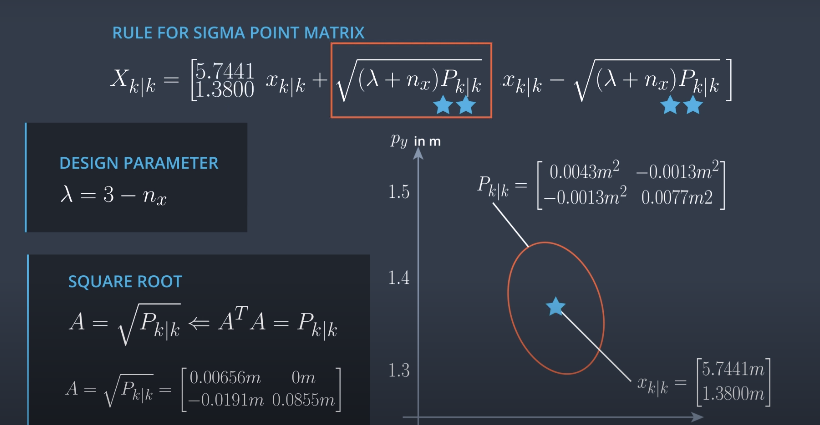

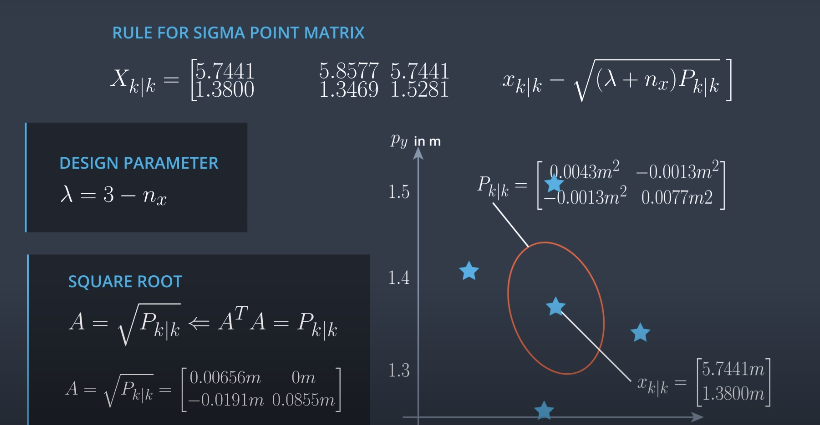


## 14. Generating Sigma Points Assignment 1

### Helpful Equations and Resources
* [Eigen Quick Reference Guide](https://eigen.tuxfamily.org/dox/group__QuickRefPage.html)
* [Eigen Documentation of Cholesky Decomposition](https://eigen.tuxfamily.org/dox/classEigen_1_1LLT.html)

## 15. Solution

```c++
void UKF::GenerateSigmaPoints(MatrixXd* Xsig_out) {

  // set state dimension
  int n_x = 5;

  // define spreading parameter
  double lambda = 3 - n_x;

  // set example state
  VectorXd x = VectorXd(n_x);
  x <<   5.7441,
         1.3800,
         2.2049,
         0.5015,
         0.3528;

  // set example covariance matrix
  MatrixXd P = MatrixXd(n_x, n_x);
  P <<     0.0043,   -0.0013,    0.0030,   -0.0022,   -0.0020,
          -0.0013,    0.0077,    0.0011,    0.0071,    0.0060,
           0.0030,    0.0011,    0.0054,    0.0007,    0.0008,
          -0.0022,    0.0071,    0.0007,    0.0098,    0.0100,
          -0.0020,    0.0060,    0.0008,    0.0100,    0.0123;

  // create sigma point matrix
  MatrixXd Xsig = MatrixXd(n_x, 2 * n_x + 1);

  // calculate square root of P
  MatrixXd A = P.llt().matrixL();

  /**
   * Student part begin
   */
   
  // set first column of sigma point matrix
  Xsig.col(0) = x;

  // set remaining sigma points
  for (int i = 0; i < n_x; ++i) {
    Xsig.col(i+1)     = x + sqrt(lambda+n_x) * A.col(i);
    Xsig.col(i+1+n_x) = x - sqrt(lambda+n_x) * A.col(i);
  }
  
  /**
   * Student part end
   */

  // print result
  // std::cout << "Xsig = " << std::endl << Xsig << std::endl;

  // write result
  *Xsig_out = Xsig;
}

/**
 * expected result:
 * Xsig =
 *  5.7441  5.85768   5.7441   5.7441   5.7441   5.7441  5.63052   5.7441   5.7441   5.7441   5.7441
 *    1.38  1.34566  1.52806     1.38     1.38     1.38  1.41434  1.23194     1.38     1.38     1.38
 *  2.2049  2.28414  2.24557  2.29582   2.2049   2.2049  2.12566  2.16423  2.11398   2.2049   2.2049
 *  0.5015  0.44339 0.631886 0.516923 0.595227   0.5015  0.55961 0.371114 0.486077 0.407773   0.5015
 *  0.3528 0.299973 0.462123 0.376339  0.48417 0.418721 0.405627 0.243477 0.329261  0.22143 0.286879
 */

```


## 16. UKF Augmentation

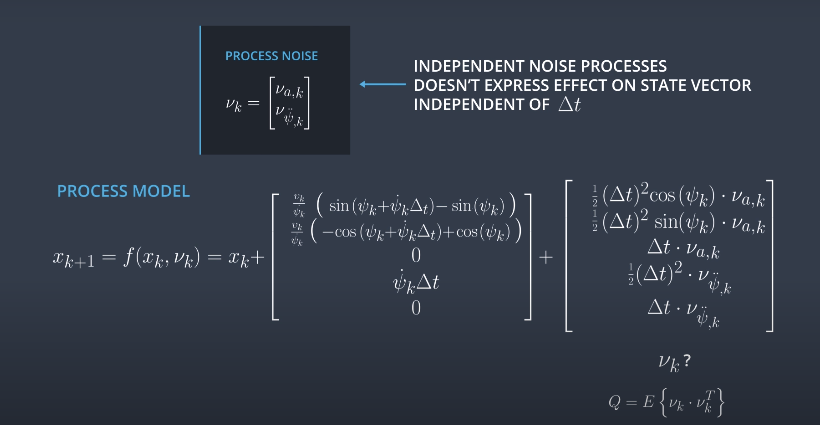

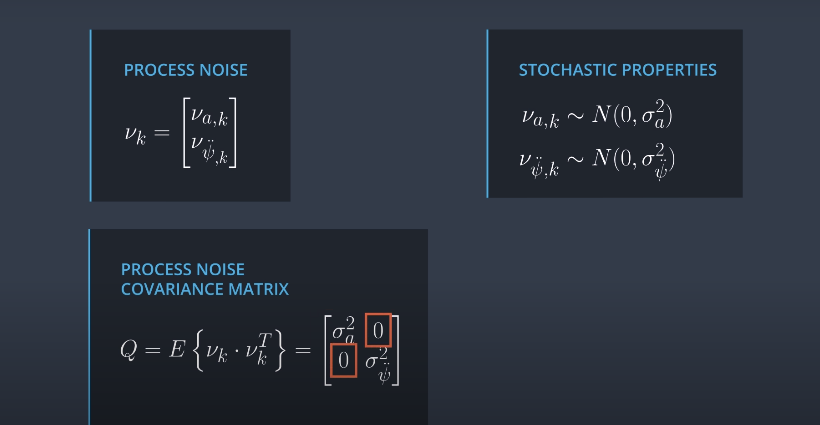

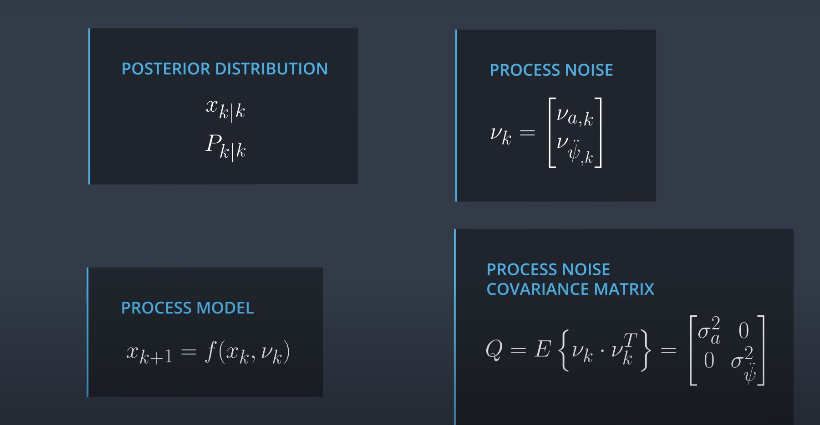

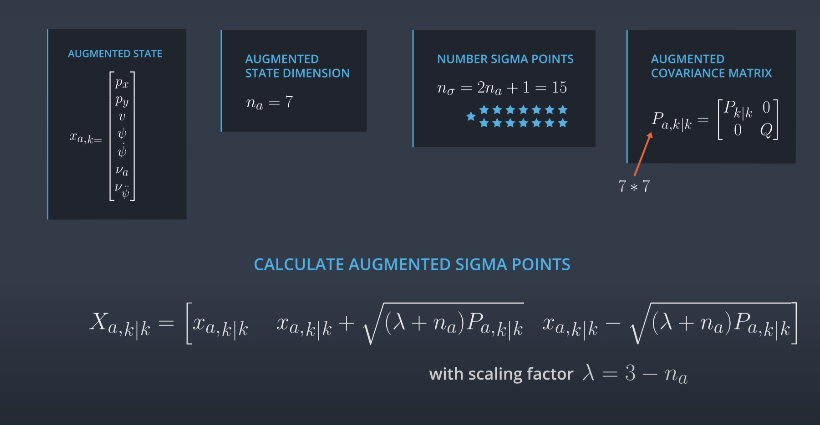


## 17. Augmentation Assignment 1

## 18. Solution

```c++
void UKF::AugmentedSigmaPoints(MatrixXd* Xsig_out) {

  // set state dimension
  int n_x = 5;

  // set augmented dimension
  int n_aug = 7;

  // Process noise standard deviation longitudinal acceleration in m/s^2
  double std_a = 0.2;

  // Process noise standard deviation yaw acceleration in rad/s^2
  double std_yawdd = 0.2;

  // define spreading parameter
  double lambda = 3 - n_aug;

  // set example state
  VectorXd x = VectorXd(n_x);
  x <<   5.7441,
         1.3800,
         2.2049,
         0.5015,
         0.3528;

  // create example covariance matrix
  MatrixXd P = MatrixXd(n_x, n_x);
  P <<     0.0043,   -0.0013,    0.0030,   -0.0022,   -0.0020,
          -0.0013,    0.0077,    0.0011,    0.0071,    0.0060,
           0.0030,    0.0011,    0.0054,    0.0007,    0.0008,
          -0.0022,    0.0071,    0.0007,    0.0098,    0.0100,
          -0.0020,    0.0060,    0.0008,    0.0100,    0.0123;

  // create augmented mean vector
  VectorXd x_aug = VectorXd(7);

  // create augmented state covariance
  MatrixXd P_aug = MatrixXd(7, 7);

  // create sigma point matrix
  MatrixXd Xsig_aug = MatrixXd(n_aug, 2 * n_aug + 1);

  /**
   * Student part begin
   */
 
  // create augmented mean state
  x_aug.head(5) = x;
  x_aug(5) = 0;
  x_aug(6) = 0;

  // create augmented covariance matrix
  P_aug.fill(0.0);
  P_aug.topLeftCorner(5,5) = P;
  P_aug(5,5) = std_a*std_a;
  P_aug(6,6) = std_yawdd*std_yawdd;

  // create square root matrix
  MatrixXd L = P_aug.llt().matrixL();

  // create augmented sigma points
  Xsig_aug.col(0)  = x_aug;
  for (int i = 0; i< n_aug; ++i) {
    Xsig_aug.col(i+1)       = x_aug + sqrt(lambda+n_aug) * L.col(i);
    Xsig_aug.col(i+1+n_aug) = x_aug - sqrt(lambda+n_aug) * L.col(i);
  }
  
  /**
   * Student part end
   */

  // print result
  std::cout << "Xsig_aug = " << std::endl << Xsig_aug << std::endl;

  // write result
  *Xsig_out = Xsig_aug;
}

/** 
 * expected result:
 *  Xsig_aug =
 * 5.7441  5.85768   5.7441   5.7441   5.7441   5.7441   5.7441   5.7441  5.63052   5.7441   5.7441   5.7441   5.7441   5.7441   5.7441
 *   1.38  1.34566  1.52806     1.38     1.38     1.38     1.38     1.38  1.41434  1.23194     1.38     1.38     1.38     1.38     1.38
 * 2.2049  2.28414  2.24557  2.29582   2.2049   2.2049   2.2049   2.2049  2.12566  2.16423  2.11398   2.2049   2.2049   2.2049   2.2049
 * 0.5015  0.44339 0.631886 0.516923 0.595227   0.5015   0.5015   0.5015  0.55961 0.371114 0.486077 0.407773   0.5015   0.5015   0.5015
 * 0.3528 0.299973 0.462123 0.376339  0.48417 0.418721   0.3528   0.3528 0.405627 0.243477 0.329261  0.22143 0.286879   0.3528   0.3528
 *      0        0        0        0        0        0  0.34641        0        0        0        0        0        0 -0.34641        0
 *      0        0        0        0        0        0        0  0.34641        0        0        0        0        0        0 -0.34641
 */

```

## 19. Sigma Point Prediction

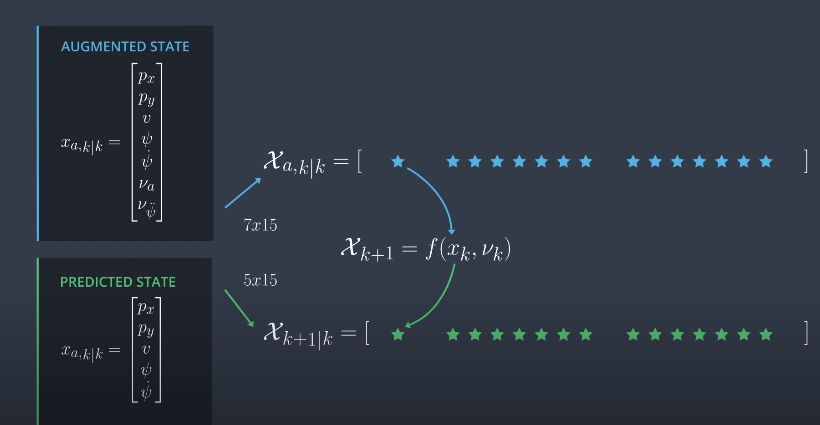

## 20. Sigma Point Prediction Assignment 1

## 21. Solution

```c++
void UKF::SigmaPointPrediction(MatrixXd* Xsig_out) {

  // set state dimension
  int n_x = 5;

  // set augmented dimension
  int n_aug = 7;

  // create example sigma point matrix
  MatrixXd Xsig_aug = MatrixXd(n_aug, 2 * n_aug + 1);
  Xsig_aug <<
    5.7441,  5.85768,   5.7441,   5.7441,   5.7441,   5.7441,   5.7441,   5.7441,   5.63052,   5.7441,   5.7441,   5.7441,   5.7441,   5.7441,   5.7441,
      1.38,  1.34566,  1.52806,     1.38,     1.38,     1.38,     1.38,     1.38,   1.41434,  1.23194,     1.38,     1.38,     1.38,     1.38,     1.38,
    2.2049,  2.28414,  2.24557,  2.29582,   2.2049,   2.2049,   2.2049,   2.2049,   2.12566,  2.16423,  2.11398,   2.2049,   2.2049,   2.2049,   2.2049,
    0.5015,  0.44339, 0.631886, 0.516923, 0.595227,   0.5015,   0.5015,   0.5015,   0.55961, 0.371114, 0.486077, 0.407773,   0.5015,   0.5015,   0.5015,
    0.3528, 0.299973, 0.462123, 0.376339,  0.48417, 0.418721,   0.3528,   0.3528,  0.405627, 0.243477, 0.329261,  0.22143, 0.286879,   0.3528,   0.3528,
         0,        0,        0,        0,        0,        0,  0.34641,        0,         0,        0,        0,        0,        0, -0.34641,        0,
         0,        0,        0,        0,        0,        0,        0,  0.34641,         0,        0,        0,        0,        0,        0, -0.34641;

  // create matrix with predicted sigma points as columns
  MatrixXd Xsig_pred = MatrixXd(n_x, 2 * n_aug + 1);

  double delta_t = 0.1; // time diff in sec

  /**
   * Student part begin
   */

  // predict sigma points
  for (int i = 0; i< 2*n_aug+1; ++i) {
    // extract values for better readability
    double p_x = Xsig_aug(0,i);
    double p_y = Xsig_aug(1,i);
    double v = Xsig_aug(2,i);
    double yaw = Xsig_aug(3,i);
    double yawd = Xsig_aug(4,i);
    double nu_a = Xsig_aug(5,i);
    double nu_yawdd = Xsig_aug(6,i);

    // predicted state values
    double px_p, py_p;

    // avoid division by zero
    if (fabs(yawd) > 0.001) {
        px_p = p_x + v/yawd * ( sin (yaw + yawd*delta_t) - sin(yaw));
        py_p = p_y + v/yawd * ( cos(yaw) - cos(yaw+yawd*delta_t) );
    } else {
        px_p = p_x + v*delta_t*cos(yaw);
        py_p = p_y + v*delta_t*sin(yaw);
    }

    double v_p = v;
    double yaw_p = yaw + yawd*delta_t;
    double yawd_p = yawd;

    // add noise
    px_p = px_p + 0.5*nu_a*delta_t*delta_t * cos(yaw);
    py_p = py_p + 0.5*nu_a*delta_t*delta_t * sin(yaw);
    v_p = v_p + nu_a*delta_t;

    yaw_p = yaw_p + 0.5*nu_yawdd*delta_t*delta_t;
    yawd_p = yawd_p + nu_yawdd*delta_t;

    // write predicted sigma point into right column
    Xsig_pred(0,i) = px_p;
    Xsig_pred(1,i) = py_p;
    Xsig_pred(2,i) = v_p;
    Xsig_pred(3,i) = yaw_p;
    Xsig_pred(4,i) = yawd_p;
  }

  /**
   * Student part end
   */

  // print result
  std::cout << "Xsig_pred = " << std::endl << Xsig_pred << std::endl;

  // write result
  *Xsig_out = Xsig_pred;
}

```

#### Note:
Some students have noticed that transposing initialized dimensions for `MatrixXd(15, 5)` produces the same result. This is due to the manner in which arguments are passed.

In `ukf.cpp`, a pointer is being passed as a function argument not as a reference:

```c++
void UKF::GenerateSigmaPoints(MatrixXd* Xsig_out) {
     ..... other code ...

    //write result
    *Xsig_out = Xsig;
    
```

Ultimately, we change the contents of the memory location which points to Xsig_out. That is why in this case the initialized dimensions are interchangeable.

See [this post](https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/forum_archive/Sigma+Point+post.pdf) for more detail.


## 22. Predicted Mean and Covariance

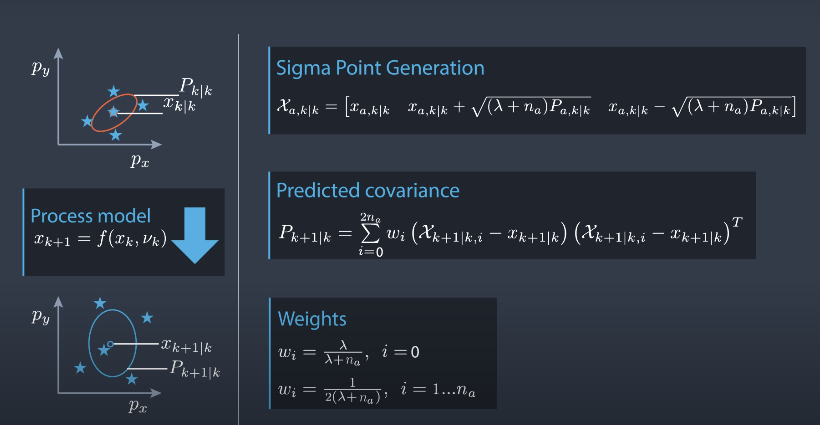

### Note Regarding Sigma Point Generation and Prediction Steps
* **Sigma Point Generation**: Sigma points are generated using `Calligraphic-X(k)`, followed by a nonlinear transformation `f(x_k,nu_k)`.
* **Sigma Point Prediction**: The generated Sigma points are propagated to obtain the state of the system at time k+1. These predicted points are denoted `Calligraphic-X(k+1)`.

## 23. Predicted Mean and Covariance Assignment 1

## 24. Solution

```c++
void UKF::PredictMeanAndCovariance(VectorXd* x_out, MatrixXd* P_out) {

  // set state dimension
  int n_x = 5;

  // set augmented dimension
  int n_aug = 7;

  // define spreading parameter
  double lambda = 3 - n_aug;

  // create example matrix with predicted sigma points
  MatrixXd Xsig_pred = MatrixXd(n_x, 2 * n_aug + 1);
  Xsig_pred <<
         5.9374,  6.0640,   5.925,  5.9436,  5.9266,  5.9374,  5.9389,  5.9374,  5.8106,  5.9457,  5.9310,  5.9465,  5.9374,  5.9359,  5.93744,
           1.48,  1.4436,   1.660,  1.4934,  1.5036,    1.48,  1.4868,    1.48,  1.5271,  1.3104,  1.4787,  1.4674,    1.48,  1.4851,    1.486,
          2.204,  2.2841,  2.2455,  2.2958,   2.204,   2.204,  2.2395,   2.204,  2.1256,  2.1642,  2.1139,   2.204,   2.204,  2.1702,   2.2049,
         0.5367, 0.47338, 0.67809, 0.55455, 0.64364, 0.54337,  0.5367, 0.53851, 0.60017, 0.39546, 0.51900, 0.42991, 0.530188,  0.5367, 0.535048,
          0.352, 0.29997, 0.46212, 0.37633,  0.4841, 0.41872,   0.352, 0.38744, 0.40562, 0.24347, 0.32926,  0.2214, 0.28687,   0.352, 0.318159;

  // create vector for weights
  VectorXd weights = VectorXd(2*n_aug+1);
  
  // create vector for predicted state
  VectorXd x = VectorXd(n_x);

  // create covariance matrix for prediction
  MatrixXd P = MatrixXd(n_x, n_x);


  /**
   * Student part begin
   */

  // set weights
  double weight_0 = lambda/(lambda+n_aug);
  weights(0) = weight_0;
  for (int i=1; i<2*n_aug+1; ++i) {  // 2n+1 weights
    double weight = 0.5/(n_aug+lambda);
    weights(i) = weight;
  }

  // predicted state mean
  x.fill(0.0);
  for (int i = 0; i < 2 * n_aug + 1; ++i) {  // iterate over sigma points
    x = x + weights(i) * Xsig_pred.col(i);
  }

  // predicted state covariance matrix
  P.fill(0.0);
  for (int i = 0; i < 2 * n_aug + 1; ++i) {  // iterate over sigma points
    // state difference
    VectorXd x_diff = Xsig_pred.col(i) - x;
    // angle normalization
    while (x_diff(3)> M_PI) x_diff(3)-=2.*M_PI;
    while (x_diff(3)<-M_PI) x_diff(3)+=2.*M_PI;

    P = P + weights(i) * x_diff * x_diff.transpose() ;
  }

  /**
   * Student part end
   */

  // print result
  std::cout << "Predicted state" << std::endl;
  std::cout << x << std::endl;
  std::cout << "Predicted covariance matrix" << std::endl;
  std::cout << P << std::endl;

  // write result
  *x_out = x;
  *P_out = P;
}

```

## 25. Measurement Prediction

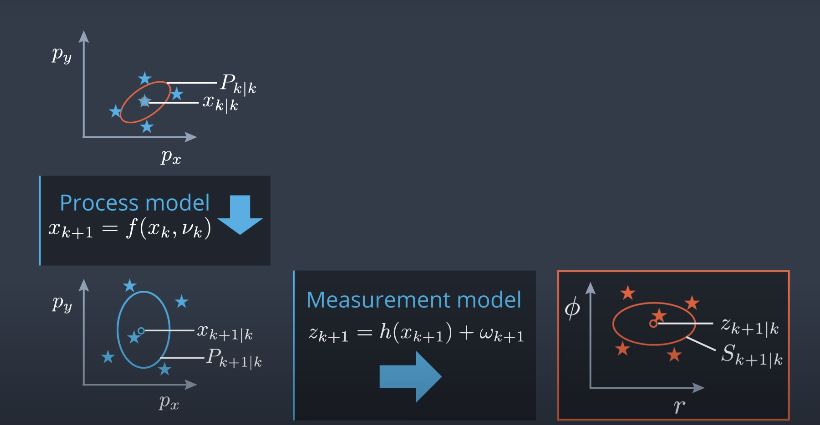

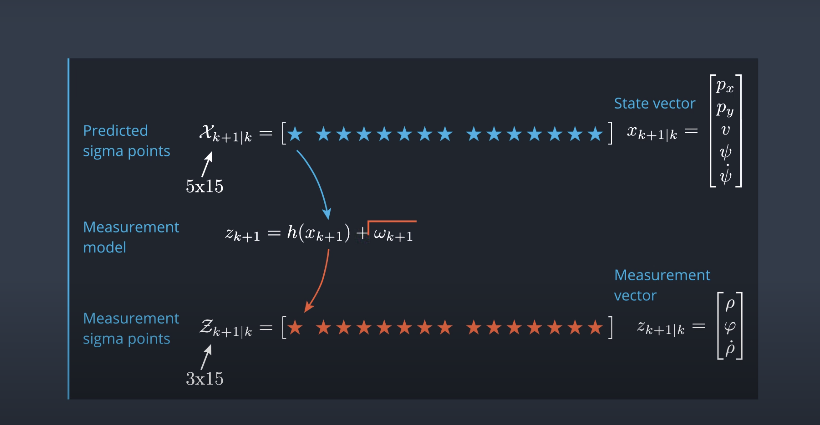

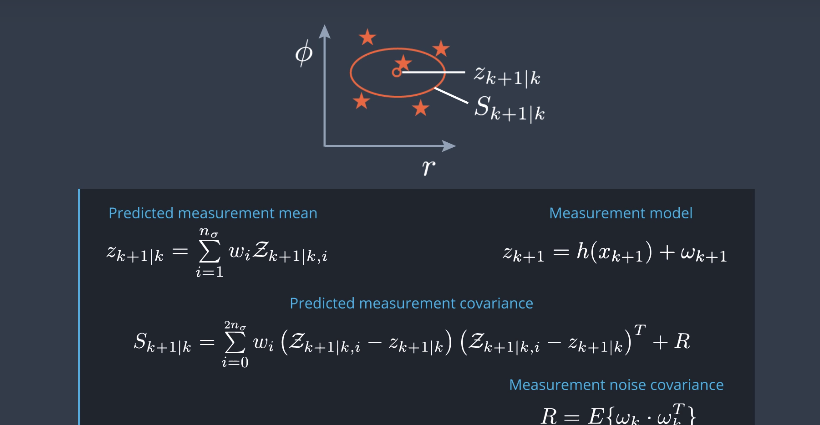

## 26. Predict Radar Measurement Assignment 1

## 27. Solution

```c++
void UKF::PredictRadarMeasurement(VectorXd* z_out, MatrixXd* S_out) {

  // set state dimension
  int n_x = 5;

  // set augmented dimension
  int n_aug = 7;

  // set measurement dimension, radar can measure r, phi, and r_dot
  int n_z = 3;

  // define spreading parameter
  double lambda = 3 - n_aug;

  // set vector for weights
  VectorXd weights = VectorXd(2*n_aug+1);
  double weight_0 = lambda/(lambda+n_aug);
  double weight = 0.5/(lambda+n_aug);
  weights(0) = weight_0;

  for (int i=1; i<2*n_aug+1; ++i) {  
    weights(i) = weight;
  }

  // radar measurement noise standard deviation radius in m
  double std_radr = 0.3;

  // radar measurement noise standard deviation angle in rad
  double std_radphi = 0.0175;

  // radar measurement noise standard deviation radius change in m/s
  double std_radrd = 0.1;

  // create example matrix with predicted sigma points
  MatrixXd Xsig_pred = MatrixXd(n_x, 2 * n_aug + 1);
  Xsig_pred <<
         5.9374,  6.0640,   5.925,  5.9436,  5.9266,  5.9374,  5.9389,  5.9374,  5.8106,  5.9457,  5.9310,  5.9465,  5.9374,  5.9359,  5.93744,
           1.48,  1.4436,   1.660,  1.4934,  1.5036,    1.48,  1.4868,    1.48,  1.5271,  1.3104,  1.4787,  1.4674,    1.48,  1.4851,    1.486,
          2.204,  2.2841,  2.2455,  2.2958,   2.204,   2.204,  2.2395,   2.204,  2.1256,  2.1642,  2.1139,   2.204,   2.204,  2.1702,   2.2049,
         0.5367, 0.47338, 0.67809, 0.55455, 0.64364, 0.54337,  0.5367, 0.53851, 0.60017, 0.39546, 0.51900, 0.42991, 0.530188,  0.5367, 0.535048,
          0.352, 0.29997, 0.46212, 0.37633,  0.4841, 0.41872,   0.352, 0.38744, 0.40562, 0.24347, 0.32926,  0.2214, 0.28687,   0.352, 0.318159;

  // create matrix for sigma points in measurement space
  MatrixXd Zsig = MatrixXd(n_z, 2 * n_aug + 1);

  // mean predicted measurement
  VectorXd z_pred = VectorXd(n_z);
  
  // measurement covariance matrix S
  MatrixXd S = MatrixXd(n_z,n_z);

  /**
   * Student part begin
   */

  // transform sigma points into measurement space
  for (int i = 0; i < 2 * n_aug + 1; ++i) {  // 2n+1 simga points
    // extract values for better readability
    double p_x = Xsig_pred(0,i);
    double p_y = Xsig_pred(1,i);
    double v  = Xsig_pred(2,i);
    double yaw = Xsig_pred(3,i);

    double v1 = cos(yaw)*v;
    double v2 = sin(yaw)*v;

    // measurement model
    Zsig(0,i) = sqrt(p_x*p_x + p_y*p_y);                       // r
    Zsig(1,i) = atan2(p_y,p_x);                                // phi
    Zsig(2,i) = (p_x*v1 + p_y*v2) / sqrt(p_x*p_x + p_y*p_y);   // r_dot
  }

  // mean predicted measurement
  z_pred.fill(0.0);
  for (int i=0; i < 2*n_aug+1; ++i) {
    z_pred = z_pred + weights(i) * Zsig.col(i);
  }

  // innovation covariance matrix S
  S.fill(0.0);
  for (int i = 0; i < 2 * n_aug + 1; ++i) {  // 2n+1 simga points
    // residual
    VectorXd z_diff = Zsig.col(i) - z_pred;

    // angle normalization
    while (z_diff(1)> M_PI) z_diff(1)-=2.*M_PI;
    while (z_diff(1)<-M_PI) z_diff(1)+=2.*M_PI;

    S = S + weights(i) * z_diff * z_diff.transpose();
  }

  // add measurement noise covariance matrix
  MatrixXd R = MatrixXd(n_z,n_z);
  R <<  std_radr*std_radr, 0, 0,
        0, std_radphi*std_radphi, 0,
        0, 0,std_radrd*std_radrd;
  S = S + R;

  /**
   * Student part end
   */

  // print result
  std::cout << "z_pred: " << std::endl << z_pred << std::endl;
  std::cout << "S: " << std::endl << S << std::endl;

  // write result
  *z_out = z_pred;
  *S_out = S;
}

```


## 28. UKF Update

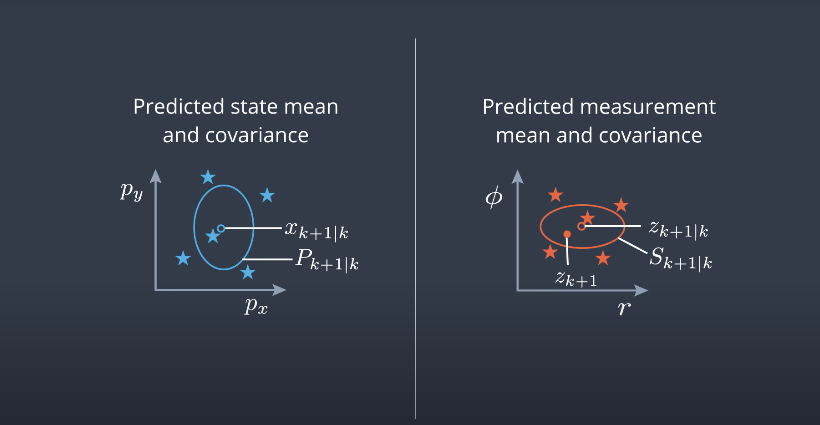

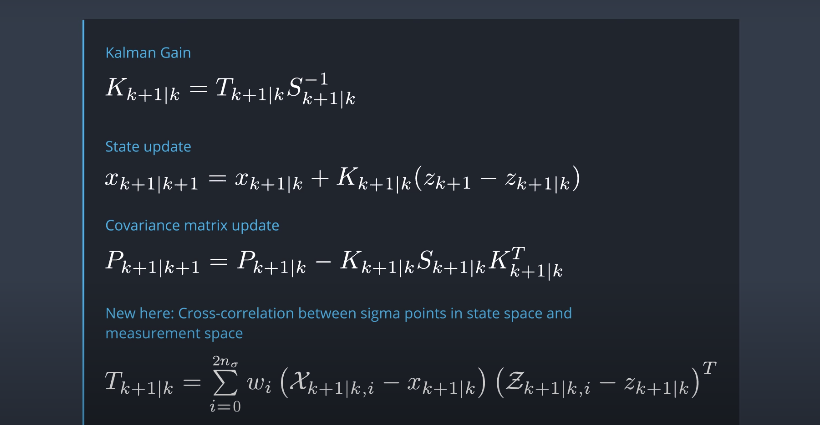

## 29. UKF Update Assignment 1

## 30. Solution

```c++
void UKF::UpdateState(VectorXd* x_out, MatrixXd* P_out) {

  // set state dimension
  int n_x = 5;

  // set augmented dimension
  int n_aug = 7;

  // set measurement dimension, radar can measure r, phi, and r_dot
  int n_z = 3;

  // define spreading parameter
  double lambda = 3 - n_aug;

  // set vector for weights
  VectorXd weights = VectorXd(2*n_aug+1);
  double weight_0 = lambda/(lambda+n_aug);
  double weight = 0.5/(lambda+n_aug);
  weights(0) = weight_0;

  for (int i=1; i<2*n_aug+1; ++i) {  
    weights(i) = weight;
  }

  // create example matrix with predicted sigma points in state space
  MatrixXd Xsig_pred = MatrixXd(n_x, 2 * n_aug + 1);
  Xsig_pred <<
     5.9374,  6.0640,   5.925,  5.9436,  5.9266,  5.9374,  5.9389,  5.9374,  5.8106,  5.9457,  5.9310,  5.9465,  5.9374,  5.9359,  5.93744,
       1.48,  1.4436,   1.660,  1.4934,  1.5036,    1.48,  1.4868,    1.48,  1.5271,  1.3104,  1.4787,  1.4674,    1.48,  1.4851,    1.486,
      2.204,  2.2841,  2.2455,  2.2958,   2.204,   2.204,  2.2395,   2.204,  2.1256,  2.1642,  2.1139,   2.204,   2.204,  2.1702,   2.2049,
     0.5367, 0.47338, 0.67809, 0.55455, 0.64364, 0.54337,  0.5367, 0.53851, 0.60017, 0.39546, 0.51900, 0.42991, 0.530188,  0.5367, 0.535048,
      0.352, 0.29997, 0.46212, 0.37633,  0.4841, 0.41872,   0.352, 0.38744, 0.40562, 0.24347, 0.32926,  0.2214, 0.28687,   0.352, 0.318159;

  // create example vector for predicted state mean
  VectorXd x = VectorXd(n_x);
  x <<
     5.93637,
     1.49035,
     2.20528,
    0.536853,
    0.353577;

  // create example matrix for predicted state covariance
  MatrixXd P = MatrixXd(n_x,n_x);
  P <<
    0.0054342,  -0.002405,  0.0034157, -0.0034819, -0.00299378,
    -0.002405,    0.01084,   0.001492,  0.0098018,  0.00791091,
    0.0034157,   0.001492,  0.0058012, 0.00077863, 0.000792973,
   -0.0034819,  0.0098018, 0.00077863,   0.011923,   0.0112491,
   -0.0029937,  0.0079109, 0.00079297,   0.011249,   0.0126972;

  // create example matrix with sigma points in measurement space
  MatrixXd Zsig = MatrixXd(n_z, 2 * n_aug + 1);
  Zsig <<
    6.1190,  6.2334,  6.1531,  6.1283,  6.1143,  6.1190,  6.1221,  6.1190,  6.0079,  6.0883,  6.1125,  6.1248,  6.1190,  6.1188,  6.12057,
   0.24428,  0.2337, 0.27316, 0.24616, 0.24846, 0.24428, 0.24530, 0.24428, 0.25700, 0.21692, 0.24433, 0.24193, 0.24428, 0.24515, 0.245239,
    2.1104,  2.2188,  2.0639,   2.187,  2.0341,  2.1061,  2.1450,  2.1092,  2.0016,   2.129,  2.0346,  2.1651,  2.1145,  2.0786,  2.11295;

  // create example vector for mean predicted measurement
  VectorXd z_pred = VectorXd(n_z);
  z_pred <<
      6.12155,
     0.245993,
      2.10313;

  // create example matrix for predicted measurement covariance
  MatrixXd S = MatrixXd(n_z,n_z);
  S <<
      0.0946171, -0.000139448,   0.00407016,
   -0.000139448,  0.000617548, -0.000770652,
     0.00407016, -0.000770652,    0.0180917;

  // create example vector for incoming radar measurement
  VectorXd z = VectorXd(n_z);
  z <<
     5.9214,   // rho in m
     0.2187,   // phi in rad
     2.0062;   // rho_dot in m/s

  // create matrix for cross correlation Tc
  MatrixXd Tc = MatrixXd(n_x, n_z);

  /**
   * Student part begin
   */

  // calculate cross correlation matrix
  Tc.fill(0.0);
  for (int i = 0; i < 2 * n_aug + 1; ++i) {  // 2n+1 simga points
    // residual
    VectorXd z_diff = Zsig.col(i) - z_pred;
    // angle normalization
    while (z_diff(1)> M_PI) z_diff(1)-=2.*M_PI;
    while (z_diff(1)<-M_PI) z_diff(1)+=2.*M_PI;

    // state difference
    VectorXd x_diff = Xsig_pred.col(i) - x;
    // angle normalization
    while (x_diff(3)> M_PI) x_diff(3)-=2.*M_PI;
    while (x_diff(3)<-M_PI) x_diff(3)+=2.*M_PI;

    Tc = Tc + weights(i) * x_diff * z_diff.transpose();
  }

  // Kalman gain K;
  MatrixXd K = Tc * S.inverse();

  // residual
  VectorXd z_diff = z - z_pred;

  // angle normalization
  while (z_diff(1)> M_PI) z_diff(1)-=2.*M_PI;
  while (z_diff(1)<-M_PI) z_diff(1)+=2.*M_PI;

  // update state mean and covariance matrix
  x = x + K * z_diff;
  P = P - K*S*K.transpose();

  /**
   * Student part end
   */

  // print result
  std::cout << "Updated state x: " << std::endl << x << std::endl;
  std::cout << "Updated state covariance P: " << std::endl << P << std::endl;

  // write result
  *x_out = x;
  *P_out = P;
}

/**
 * expected result x:
 * x =
 *  5.92276
 *  1.41823
 *  2.15593
 * 0.489274
 * 0.321338
 */

/**
 * expected result P:
 * P =
 *   0.00361579 -0.000357881   0.00208316 -0.000937196  -0.00071727
 * -0.000357881   0.00539867   0.00156846   0.00455342   0.00358885
 *   0.00208316   0.00156846   0.00410651   0.00160333   0.00171811
 * -0.000937196   0.00455342   0.00160333   0.00652634   0.00669436
 *  -0.00071719   0.00358884   0.00171811   0.00669426   0.00881797
 */

```


## 31. Parameters and Consistency

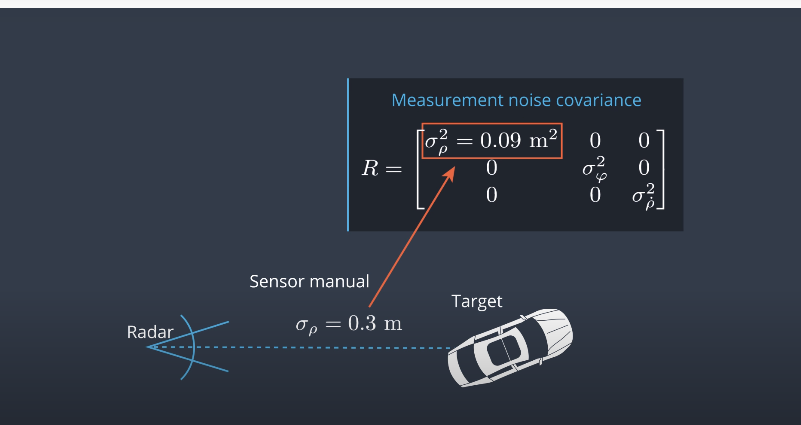

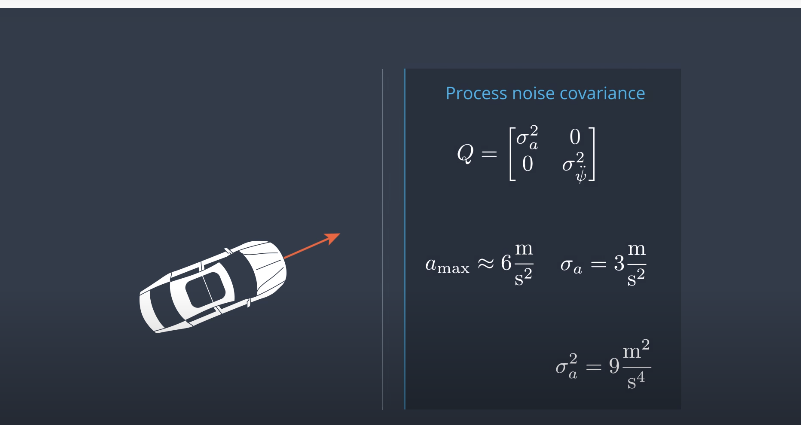







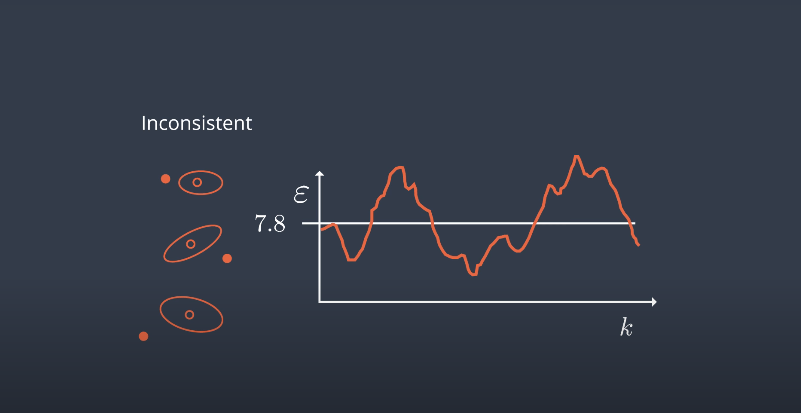



Process Noise and the UKF Project
For the CTRV model, two parameters define the process noise:

* σ_{a}^2 representing longitudinal acceleration noise (you might see this referred to as linear acceleration)
* σ_{ψ_dd}^2 representing yaw acceleration noise (this is also called angular acceleration)

In the project, both of these values will need to be tuned. You will have to test different values in order to get a working solution. In the video, Dominik mentions using σ_{a}^2 = 9 
m^2/s^4 as a starting point when tracking a vehicle. In the UKF project, you will be tracking a bicycle rather than a vehicle. So 9 might not be an appropriate acceleration noise parameter. Tuning will involve:

* guessing appropriate parameter values
* running the UKF filter
* deciding if the results are good enough
* tweaking the parameters and repeating the process

### a) Linear Acceleration Noise Parameter Intuition
Let's get some intuition for these noise parameters. The units for the acceleration noise parameter σ_{a}^2 are m^2/s^4. Taking the square root, we get σ_{a} with units m/s^2. So the square root of the acceleration noise parameter has the same units as acceleration: m/s^2

The parameter σ_{a} is the standard deviation of linear acceleration! Remember from the "CTRV Process Noise Vector" lecture that the linear acceleration is being modeled as a Gaussian distribution with mean zero and standard deviation σ_{a}. In a Gaussian distribution, about 95% of your values are within 2σ_{a}.

So if you choose σ_{a}^2 are m^2/s^4, then you expect the acceleration to be between -6m/s^2 and +6 m/s^2 about 95% of the time.

Tuning parameters involves some trial and error. Using your intuition can help you find reasonable initial values.

### b) Yaw Acceleration Noise Parameter Intuition
If yaw acceleration has units of radians/s^2, what are the units of the yaw acceleration noise parameter σ_{ψ_dd}^2?

**Answer: radians^2/s^4**

Let's think about what values might be reasonable for the yaw acceleration noise parameter.

Imagine the bicycle is traveling in a circle with a constant yaw rate (angular velocity) of π/8 rad/s. That means the bicycle would complete a full circle in 16 seconds: π/8 rad/s ⋅ 16 s = 2π.

That seems reasonable for an average bike rider traveling in a circle with a radius of maybe 16 meters.

The bike rider would have also have a tangential velocity of 6.28 meters per second because π/8 rad/s ⋅ 16 meters = 6.28 meters per second.

What if the angular acceleration were now −2π rad/s^2 instead of zero? In just one second, the angular velocity would go fromπ/8 rad/s to −15π/8 rad/s. This comes from π/8 rad/s − 2π rad/s^2 ⋅1 s = −15π/8 rad/s.

The bicycle has been completing a complete circle in 16 seconds. But with such a high angular acceleration, then all of a sudden the bicycle is going around the circle in the opposite direction and only takes about 1.1 second to complete the circle.

From a bicycle, a setting in the range of σ_{ψ_dd}^2 = 2π rad/s^2 seems too high. In the project, you'll have to experiment with different values to see what works well.

### c) Measurement Noise Parameters
Measurement noise parameters represent uncertainty in sensor measurements. In general, the manufacturer will provide these values in the sensor manual. In the UKF project, you will not need to tune these parameters.

## 32. What to Expect from the Project





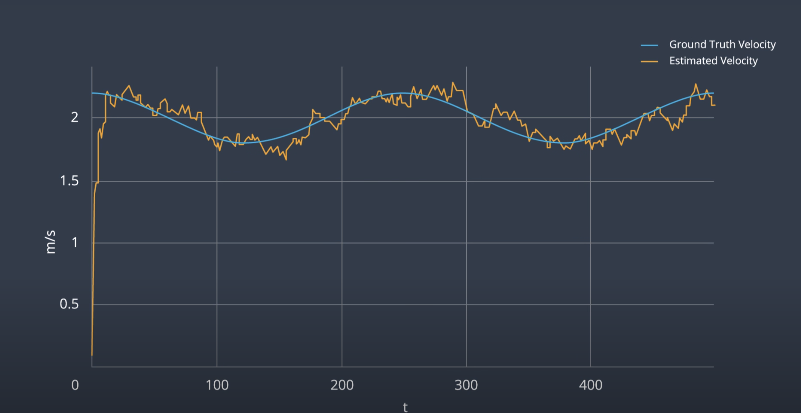

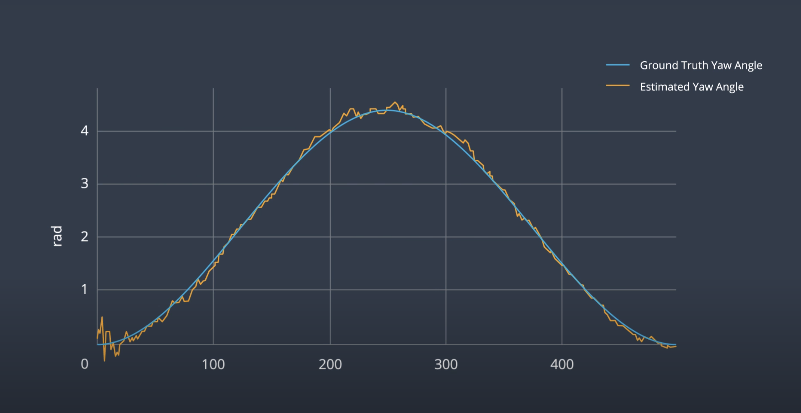

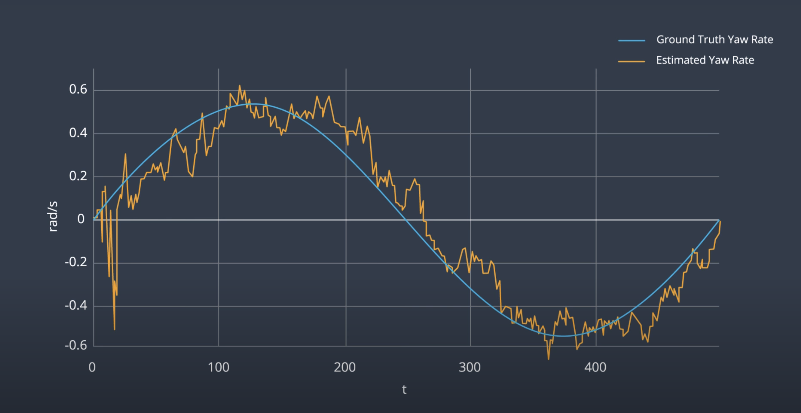

### a) Initializing the Kalman Filter
As discussed previously, the process noise parameters have an important effect on your Kalman filter; you will need to tune the longitudinal and yaw acceleration noise parameters as part of the project.

The initial values for your state variables will also affect your Kalman filter's performance. Both the:
* state vector x and the
* state covariance matrix P

need to be initialized for the unscented Kalman filter to work properly.

#### Initializing the State Vector x
The state vector x contains x = [p x,p y,v,ψ,ψ˙d].

You won't know where the bicycle is until you receive the first sensor measurement. Once the first sensor measurement arrives, you can initialize p_x and p_y.

For the other variables in the state vector x, you can try different initialization values to see what works best.

Note that although radar does include velocity information, the radar velocity and the CTRV velocity are not the same. Radar velocity is measured from the autonomous vehicle's perspective. If you drew a straight line from the vehicle to the bicycle, radar measures the velocity along that line.

In the CTRV model, the velocity is from the object's perspective, which in this case is the bicycle; the CTRV velocity is tangential to the circle along which the bicycle travels. Therefore, you cannot directly use the radar velocity measurement to initialize the state vector.

#### Initializing the State Covariance Matrix P
To initialize the state covariance matrix P, one option is to start with the identity matrix. For the CTRV model, P is a 5x5 matrix. The identity matrix would be:

P_initial = 10000 01000 00100 00010 00001

Think back to what the state covariance matrix represents: take for example the value in the first row, second column. The value at (1, 2) would be the covariance σ_{px, py} measuring the linear relationship between the two variables.

The diagonal values represent the variances for each of the variables in the x state vector: [σ^2_{p_x}, σ^2_{p_y}, σ^2_{v}, σ^2_{ψ}, σ^2_{ψ_d}]

Why is the identity matrix a good place to start? Since the non-diagonal values represent the covariances between variables, the P matrix is symmetrical. The identity matrix is also symmetrical. The symmetry comes from the fact that the covariance between two variables is the same whether you look at (x, y) or (y, x): σ_{px, py} = σ_{py, px}. If you print out the P matrix in your UKF code, you will see that P remains symmetrical even after the matrix gets updated. If your solution is working, you will also see that P starts to converge to small values relatively quickly.

Instead of setting each of the diagonal values to 1, you can try setting the diagonal values by how much difference you expect between the true state and the initialized x state vector. For example, in the project, we assume the standard deviation of the lidar x and y measurements is 0.15. If we initialized p_x with a lidar measurement, the initial variance or uncertainty in p_x would probably be less than 1.

You will have to experiment with different initialization values to find a working solution.


## 33. Story Time

## 34. Outro

## 35. Bonus Round: Sensor Fusion [Optional]
Nice work reaching the end of the sensor fusion content! While you still have the project left to do here, we're also providing some additional resources and recent research on the topic that you can come back to if you have time later on.

Reading research papers is a great way to get exposure to the latest and greatest in the field, as well as expand your learning. However, just like the project ahead, it's often best to learn by doing - if you find a paper that really excites you, try to implement it (or even something better) yourself!

#### Optional Reading
All of these are completely optional reading - you could spend days reading through the entirety of these! We suggest moving onto the project first so you have Kalman Filters fresh on your mind, before coming back to check these out.

We've categorized these papers to hopefully help you narrow down which ones might be of interest, as well as highlighted a couple key reads by category by including their Abstract section, which summarizes the paper. We've also included some additional papers you might consider as well if you want to delve even deeper.

### a) Tracking Multiple Objects and Sensor Fusion
The below papers and resources concern tracking multiple objects, using Kalman Filters as well as other techniques!

[No Blind Spots: Full-Surround Multi-Object Tracking for Autonomous Vehicles using Cameras & LiDARs](https://arxiv.org/pdf/1802.08755.pdf) by A. Rangesh and M. Trivedi
> **Abstract:** Online multi-object tracking (MOT) is extremely important for high-level spatial reasoning and path planning for autonomous and highly-automated vehicles. In this paper, we present a modular framework for tracking multiple objects (vehicles), capable of accepting object proposals from different sensor modalities (vision and range) and a variable number of sensors, to produce continuous object tracks. [...] We demonstrate that our framework is well-suited to track objects through entire maneuvers around the ego-vehicle, some of which take more than a few minutes to complete. We also leverage the modularity of our approach by comparing the effects of including/excluding different sensors, changing the total number of sensors, and the quality of object proposals on the final tracking result.

[Multiple Sensor Fusion and Classification for Moving Object Detection and Tracking](https://hal.archives-ouvertes.fr/hal-01241846/document) by R.O. Chavez-Garcia and O. Aycard
> **Abstract:** [...] We believe that by including the objects classification from multiple sensors detections as a key component of the object’s representation and the perception process, we can improve the perceived model of the environment. First, we define a composite object representation to include class information in the core object’s description. Second, we propose a complete perception fusion architecture based on the Evidential framework to solve the Detection and Tracking of Moving Objects (DATMO) problem by integrating the composite representation and uncertainty management. Finally, we integrate our fusion approach in a real-time application inside a vehicle demonstrator from the interactIVe IP European project which includes three main sensors: radar, lidar and camera. [...]

### b) Stereo cameras
The below papers cover various methods of using stereo camera set-ups for object detection and tracking.

[Robust 3-D Motion Tracking from Stereo Images: A Model-less Method](http://www.cse.cuhk.edu.hk/~khwong/J2008_IEEE_TIM_Stereo%20Kalman%20.pdf) by Y.K. Yu, et. al.
> **Abstract:** Traditional vision-based 3-D motion estimation algorithms require given or calculated 3-D models while the motion is being tracked. We propose a high-speed extended Kalman filter-based approach that recovers camera position and orientation from stereo image sequences without prior knowledge as well as the procedure for the reconstruction of 3-D structures. [...] The proposed method has been applied to recover the motion from stereo image sequences taken by a robot and a hand-held stereo rig. The results are accurate compared to the ground truths. It is shown in the experiment that our algorithm is not susceptible to outlying point features with the application of a validation gate.

[Vehicle Tracking and Motion Estimation Based on Stereo Vision Sequences](http://hss.ulb.uni-bonn.de/2010/2356/2356.pdf) by A. Barth (long read)
> **Abstract:** In this dissertation, a novel approach for estimating trajectories of road vehicles such as cars, vans, or motorbikes, based on stereo image sequences is presented. Moving objects are detected and reliably tracked in real-time from within a moving car. [...] The focus of this contribution is on oncoming traffic, while most existing work in the literature addresses tracking the lead vehicle. The overall approach is generic and scalable to a variety of traffic scenes including inner city, country road, and highway scenarios. [...] The key idea is to derive these parameters from a set of tracked 3D points on the object’s surface, which are registered to a time-consistent object coordinate system, by means of an extended Kalman filter. Combining the rigid 3D point cloud model with the dynamic model of a vehicle is one main contribution of this thesis. [...] The experimental results show the proposed system is able to accurately estimate the object pose and motion parameters in a variety of challenging situations, including night scenes, quick turn maneuvers, and partial occlusions.

### c) Deep Learning-based approaches
The below papers include various deep learning-based approaches to 3D object detection and tracking.

[Fast and Furious: Real Time End-to-End 3D Detection, Tracking and Motion Forecasting with a Single Convolutional Net](http://openaccess.thecvf.com/content_cvpr_2018/papers/Luo_Fast_and_Furious_CVPR_2018_paper.pdf) by W. Luo, et. al.
> **Abstract:** In this paper we propose a novel deep neural network that is able to jointly reason about 3D detection, tracking and motion forecasting given data captured by a 3D sensor. By jointly reasoning about these tasks, our holistic approach is more robust to occlusion as well as sparse data at range. Our approach performs 3D convolutions across space and time over a bird’s eye view representation of the 3D world, which is very efficient in terms of both memory and computation. Our experiments on a new very large scale dataset captured in several north american cities, show that we can outperform the state-of-the-art by a large margin. Importantly, by sharing computation we can perform all tasks in as little as 30 ms.

[VoxelNet: End-to-End Learning for Point Cloud Based 3D Object Detection](https://arxiv.org/abs/1711.06396) by Y. Zhou and O. Tuzel
> **Abstract:** Accurate detection of objects in 3D point clouds is a central problem in many applications, such as autonomous navigation, housekeeping robots, and augmented/virtual reality. To interface a highly sparse LiDAR point cloud with a region proposal network (RPN), most existing efforts have focused on hand-crafted feature representations, for example, a bird's eye view projection. In this work, we remove the need of manual feature engineering for 3D point clouds and propose VoxelNet, a generic 3D detection network that unifies feature extraction and bounding box prediction into a single stage, end-to-end trainable deep network. [...] Experiments on the KITTI car detection benchmark show that VoxelNet outperforms the state-of-the-art LiDAR based 3D detection methods by a large margin. Furthermore, our network learns an effective discriminative representation of objects with various geometries, leading to encouraging results in 3D detection of pedestrians and cyclists, based on only LiDAR.

### d) Other papers on Tracking Multiple Objects and Sensor Fusion
The below papers and resources concern tracking multiple objects, using Kalman Filters as well as other techniques! We have not included the abstracts here for brevity, but you should check those out first to see which of these you want to take a look at.

> [Multiple Object Tracking using Kalman Filter and Optical Flow](http://www.ejaet.com/PDF/2-2/EJAET-2-2-34-39.pdf) by S. Shantaiya, et. al.

> [Kalman Filter Based Multiple Objects Detection-Tracking Algorithm Robust to Occlusion](https://pdfs.semanticscholar.org/f5a2/bf3df3126d2923a617b977ec2b4e1c829a08.pdf) by J-M Jeong, et. al.

> [Tracking Multiple Moving Objects Using Unscented Kalman Filtering Techniques](https://arxiv.org/pdf/1802.01235.pdf) by X. Chen, et. al.

> [LIDAR-based 3D Object Perception](https://velodynelidar.com/lidar/hdlpressroom/pdf/Articles/LIDAR-based%203D%20Object%20Perception.pdf) by M. Himmelsbach, et. al

> [Fast multiple objects detection and tracking fusing color camera and 3D LIDAR for intelligent vehicles](https://www.researchgate.net/publication/309503024_Fast_multiple_objects_detection_and_tracking_fusing_color_camera_and_3D_LIDAR_for_intelligent_vehicles) by S. Hwang, et. al.

> [3D-LIDAR Multi Object Tracking for Autonomous Driving](https://repository.tudelft.nl/islandora/object/uuid%3Af536b829-42ae-41d5-968d-13bbaa4ec736) by A.S. Rachman (long read)

